In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 kB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


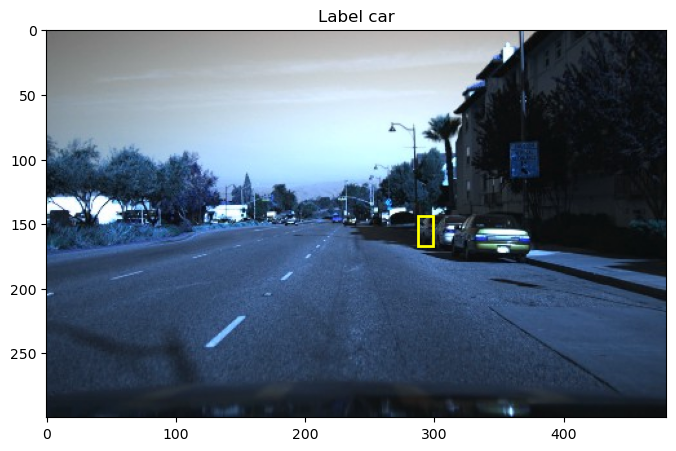

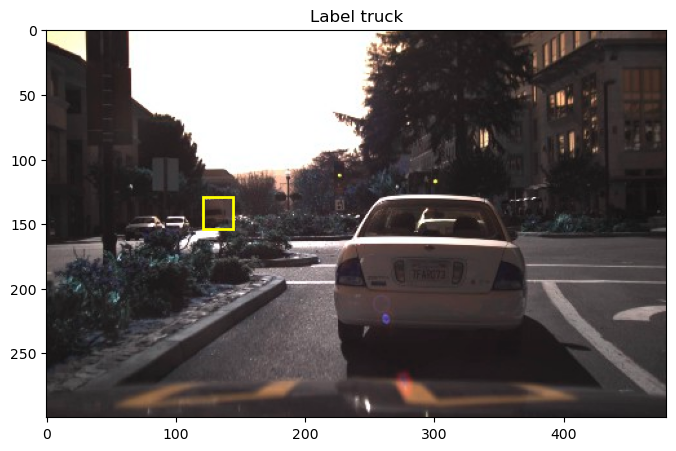

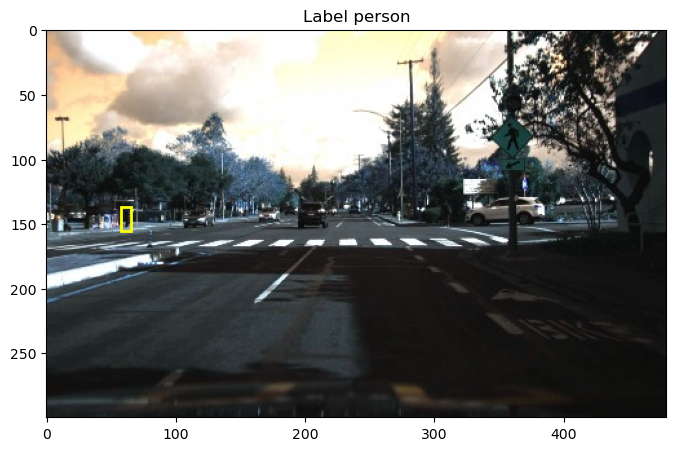

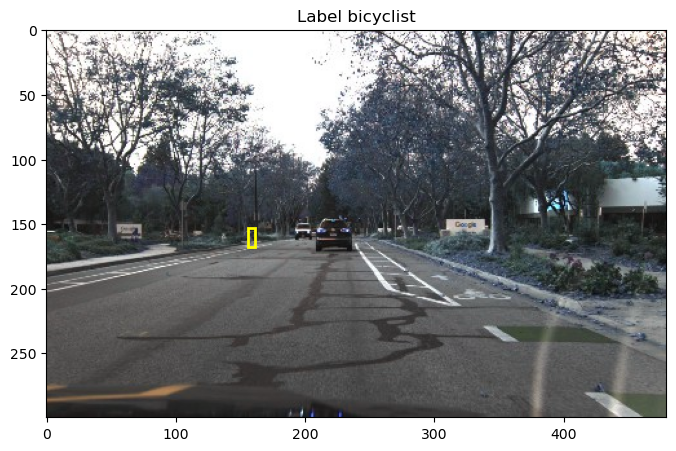

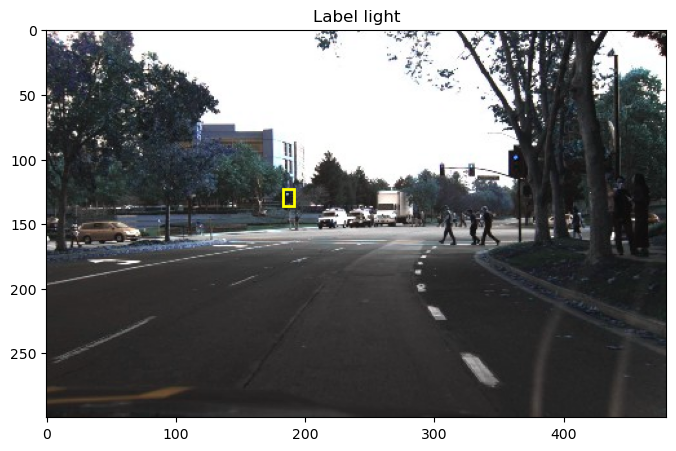

100%|██████████| 83.7M/83.7M [00:01<00:00, 72.3MB/s]

image 1/1 /kaggle/input/self-driving-cars/images/1478019960680764792.jpg: 416x640 3 cars, 1237.5ms
Speed: 10.4ms preprocess, 1237.5ms inference, 21.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


Image: /kaggle/input/self-driving-cars/images/1478019960680764792.jpg
Object type: car
Coordinates: [88, 138, 168, 191]
Probability: 0.91
---
Image: /kaggle/input/self-driving-cars/images/1478019960680764792.jpg
Object type: car
Coordinates: [185, 143, 197, 151]
Probability: 0.71
---
Image: /kaggle/input/self-driving-cars/images/1478019960680764792.jpg
Object type: car
Coordinates: [166, 143, 176, 151]
Probability: 0.53
---


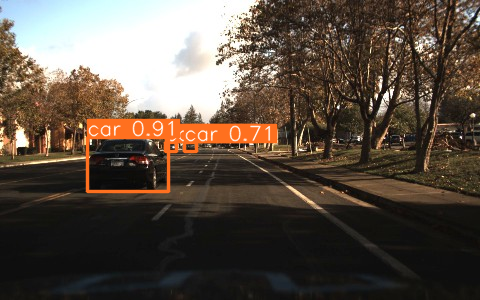


image 1/1 /kaggle/input/self-driving-cars/images/1478019964687995430.jpg: 416x640 2 cars, 1094.3ms
Speed: 2.5ms preprocess, 1094.3ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


Image: /kaggle/input/self-driving-cars/images/1478019964687995430.jpg
Object type: car
Coordinates: [185, 144, 212, 164]
Probability: 0.85
---
Image: /kaggle/input/self-driving-cars/images/1478019964687995430.jpg
Object type: car
Coordinates: [103, 146, 126, 162]
Probability: 0.79
---


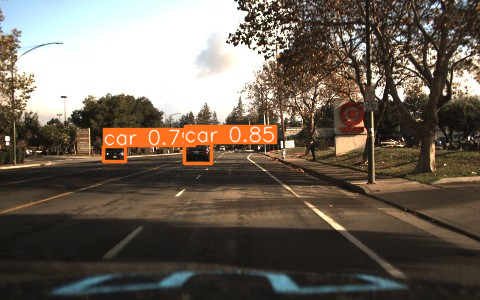

In [2]:
import numpy as np
import pandas as pd
import cv2
from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from ultralytics import YOLO

import warnings
warnings.simplefilter('ignore')

CLASS_LABELS = {
    1: 'car',
    2: 'truck',
    3: 'person',
    4: 'bicyclist',
    5: 'light'
}

IMAGE_PATHS = [
    "/kaggle/input/self-driving-cars/images/1478019960680764792.jpg",
    "/kaggle/input/self-driving-cars/images/1478019964687995430.jpg"
]

def load_dataset(csv_path):
    df = pd.read_csv(csv_path)
    return shuffle(df)

def load_images_and_boxes(df, base_path):
    boxes = {}
    images = {}
    
    for class_id, label in CLASS_LABELS.items():
        first_row = df[df['class_id'] == class_id].iloc[0]
        image = cv2.imread(base_path + first_row['frame'])
        images[class_id] = image
        boxes[class_id] = [
            first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']
        ]
    
    return images, boxes

def display_annotated_images(images, boxes):
    for class_id, label in CLASS_LABELS.items():
        xmin, xmax, ymin, ymax = boxes[class_id]
        
        plt.figure(figsize=(8, 10))
        plt.title("Label " + label)
        plt.imshow(images[class_id])
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, color='yellow', fill=False, linewidth=2))
        plt.show()

def process_images_and_detect_objects(model, image_paths):
    for image_path in image_paths:
        results = model.predict(source=image_path, save=True, conf=0.5, iou=0.7)
        result = results[0]
        
        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = [round(coord) for coord in box.xyxy[0].tolist()]
            conf = round(box.conf[0].item(), 2)
            
            print("Image:", image_path)
            print("Object type:", class_id)
            print("Coordinates:", cords)
            print("Probability:", conf)
            print("---")
        
        plot = result.plot()
        plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(plot))

def main():
    csv_path = '../input/self-driving-cars/labels_train.csv'
    df = load_dataset(csv_path)

    base_path = '../input/self-driving-cars/images/'
    images, boxes = load_images_and_boxes(df, base_path)

    display_annotated_images(images, boxes)

    model = YOLO("yolov8l.pt")

    process_images_and_detect_objects(model, IMAGE_PATHS)

if __name__ == "__main__":
    main()
